# Project Title:

“Sentiment Analysis of Twitter Data Using Machine Learning”

# Project Introduction:

Social media platforms like Twitter have become powerful tools for expressing public opinion and sentiment about political leaders, products, and current events. Understanding these sentiments can help organizations, policymakers, and researchers gauge public perception, identify trends, and make data-driven decisions.

This project focuses on analyzing a large dataset of tweets related to political discourse, specifically around election campaigns, to classify the sentiment expressed in each tweet as positive, neutral, or negative. The dataset was preprocessed to clean the text, remove noise, and normalize the content for analysis.

A variety of natural language processing (NLP) techniques were applied, including text normalization, tokenization, and feature extraction using TF–IDF vectors. Additionally, lexical features such as sentiment polarity and subjectivity were considered to enhance model performance.

Multiple machine learning algorithms were implemented and compared, including:

Logistic Regression

Naive Bayes

Support Vector Machines (SVM)

Evaluation metrics such as accuracy, precision, recall, F1-score, and confusion matrices were used to compare model performance. The results showed that SVM provided the best performance on the test set, demonstrating its effectiveness for text classification tasks with high-dimensional sparse features.

This project highlights the power of combining feature engineering with robust machine learning algorithms to perform accurate sentiment analysis on social media data, providing actionable insights into public opinion.

# Project Objective 

The main objective of this project is to develop a machine learning-based sentiment analysis model that can accurately predict whether a given text expresses positive or negative sentiment.



# Specific objectives:

Clean and preprocess text to remove noise and standardize inputs for the model.

Convert text into features suitable for machine learning (e.g., TF-IDF vectors, embeddings).

Train and compare multiple models (e.g., Naive Bayes, SVM, Logistic Regression, or deep learning models) to find the best-performing classifier.

Evaluate model performance using metrics such as accuracy, precision, recall, and F1-score.

Visualize sentiment trends or distributions to provide insights into public opinion.

Analyze misclassified texts to improve model understanding and feature engineering.

# Data importation/inspectation

In [22]:
import pandas as pd


df = pd.read_csv(r"C:\Users\shadrach\Downloads\Twitter_Data.csv")


print(df.shape)
df.sample(5)


(162980, 2)


,clean_text,category
87935,only honotable narendra modi,0.0
132168,tonight first interview modi before elections ...,1.0
57285,defence minister said there money buy fighter ...,-1.0
37269,and still there are modi bhakts this incredibl...,1.0
125990,saare iirc you and your party wanted modi reve...,0.0


In [23]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [24]:

df['category'].value_counts()

category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

# Data Cleaning(Check for missing values and data types)


In [25]:

print("\n--- Data Info ---")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None

Missing values per column:
clean_text    4
category      7
dtype: int64


In [26]:
print("\n--- Label Distribution ---")
print(df['category'].value_counts())
print("\n--- Label Distribution (%) ---")
print(round(df['category'].value_counts(normalize=True) * 100, 2))


--- Label Distribution ---
category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

--- Label Distribution (%) ---
category
 1.0    44.33
 0.0    33.88
-1.0    21.79
Name: proportion, dtype: float64


In [27]:
 #Drop missing values
df = df.dropna(subset=['clean_text', 'category'])

In [28]:
##Define text cleaning function
def clean_tweet(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+|www.\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation & special chars
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    text = text.replace('â€œ', '"').replace('â€', '"').replace('â€™', "'")  # fix encoding artifacts
    return text


In [29]:
# Check how many duplicate rows exist
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 1


In [30]:
# Display the duplicate rows
duplicates = df[df.duplicated()]
duplicates.head()  # show first 5 duplicates


,clean_text,category
161347,2019,0.0


In [31]:
# Remove duplicate rows
df = df.drop_duplicates()

In [32]:
df.shape

(162968, 2)

In [33]:
df = df.dropna(subset=['clean_text', 'category'])
df = df[df['clean_text'].str.strip() != '']


# Data Normalization

In [34]:
# 2. Convert sentiment labels to int
import pandas as pd
import re
df['category'] = df['category'].astype(int)



In [35]:
df['clean_text'] = df['clean_text'].apply(clean_tweet)


In [36]:
##Check the cleaned output
print("Data cleaned successfully!")
display(df.sample(5))
print("\n--- Updated Info ---")
print(df.info())

Data cleaned successfully!


,clean_text,category
91593,thats why need the answer the question modi as...,0
146459,why can modi hailedfor air strikes asks via,0
101252,chacha nehru great scientist made and a given ...,1
67855,modi giving all the opposition very long rope ...,-1
159336,varnasi not safe for modi whi priyanka vadra n...,0



--- Updated Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 162967 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162967 non-null  object
 1   category    162967 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 3.1+ MB
None


# Exploratory Data Analysis (EDA)

C:\Users\shadrach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shadrach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shadrach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


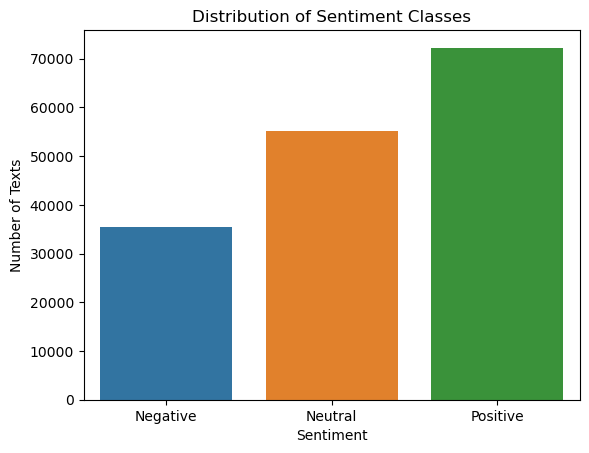

In [37]:
##Class Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='category', data=df)
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Number of Texts')
plt.xticks(ticks=[0,1,2], labels=['Negative','Neutral','Positive'])
plt.show()



C:\Users\shadrach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shadrach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shadrach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


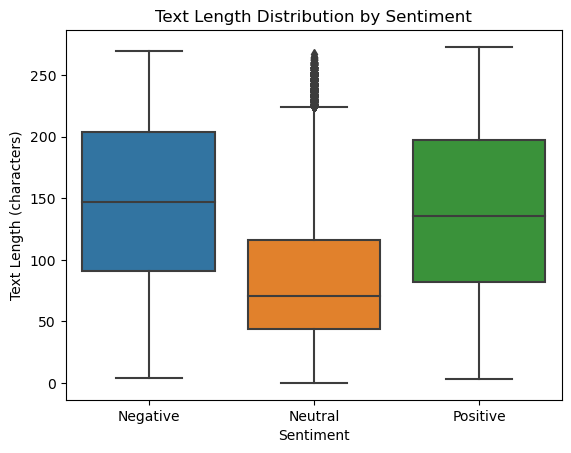

In [38]:
##Text Length Distribution by Sentiment
df['text_length'] = df['clean_text'].apply(len)


sns.boxplot(x='category', y='text_length', data=df)
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length (characters)')
plt.xticks(ticks=[0,1,2], labels=['Negative','Neutral','Positive'])
plt.show()


In [39]:
from wordcloud import WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


def generate_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()




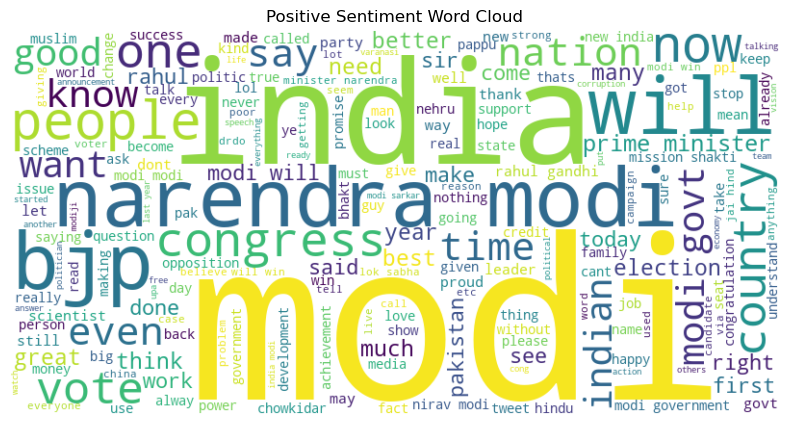

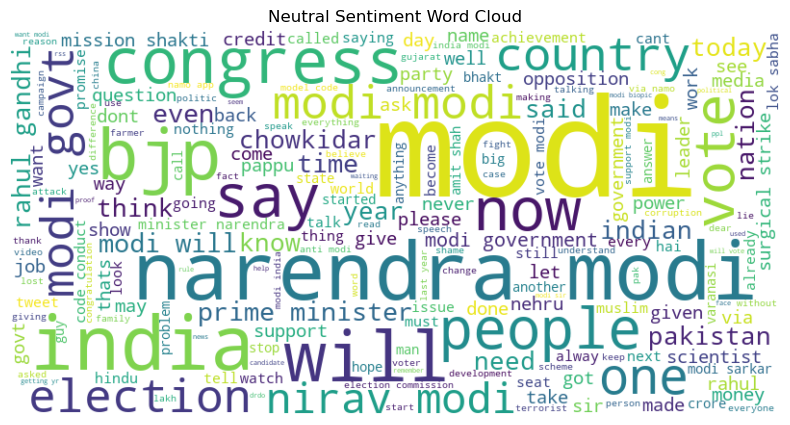

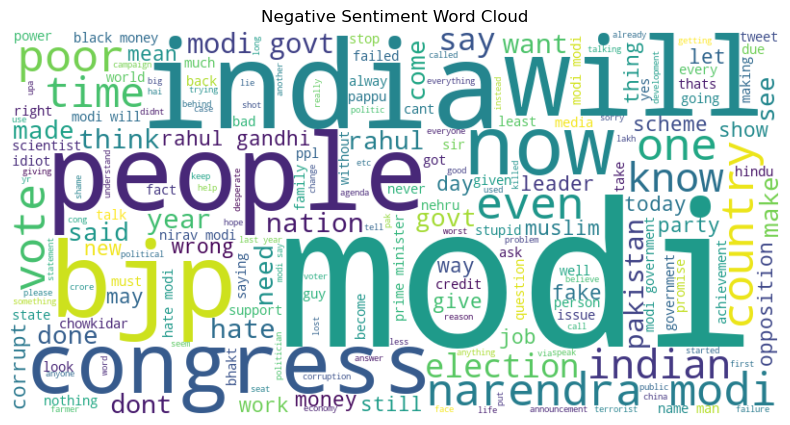

In [40]:
generate_wordcloud(df[df['category']==1]['clean_text'], 'Positive Sentiment Word Cloud')
generate_wordcloud(df[df['category']==0]['clean_text'], 'Neutral Sentiment Word Cloud')
generate_wordcloud(df[df['category']==-1]['clean_text'], 'Negative Sentiment Word Cloud')

C:\Users\shadrach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shadrach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shadrach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


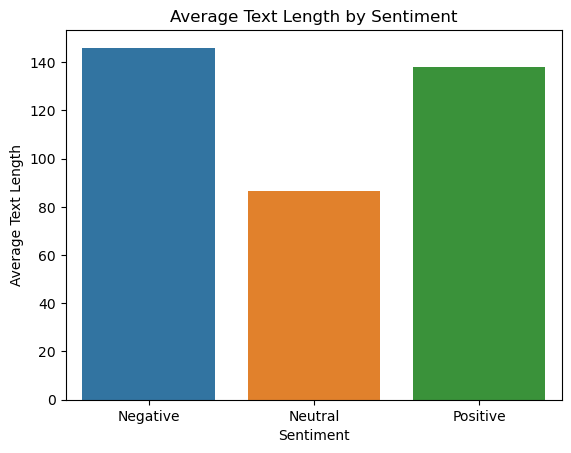

In [41]:
avg_length = df.groupby('category')['text_length'].mean().reset_index()

sns.barplot(x='category', y='text_length', data=avg_length)
plt.title('Average Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Text Length')
plt.xticks(ticks=[0,1,2], labels=['Negative','Neutral','Positive'])
plt.show()


# Tokenization & Feature Extraction{ Natural Language Pro cessing (NLP):}

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['clean_text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=45, stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 130373
Testing samples: 32594


In [43]:
# 2. TF–IDF Vectorization
vectorizer = TfidfVectorizer(
    max_features=5000,       
    ngram_range=(1, 2),     
    stop_words='english'    
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF matrix shape (train): {X_train_tfidf.shape}")
print(f"TF-IDF matrix shape (test):  {X_test_tfidf.shape}")

TF-IDF matrix shape (train): (130373, 5000)
TF-IDF matrix shape (test):  (32594, 5000)


In [44]:
#Feature enginering

In [45]:
##Add Linguistic Features
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['clean_text'].apply(len)
df['avg_word_length'] = df['char_count'] / df['word_count']


In [46]:
# Ensure no NaN or inf values in numeric features
import numpy as np
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['clean_text'].apply(len)
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_word_length'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna({'avg_word_length': 0}, inplace=True)

In [47]:
##add Use Sentiment Lexicons
from textblob import TextBlob

df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [48]:
df




,clean_text,category,text_length,word_count,char_count,avg_word_length,polarity,subjectivity
0,when modi promised minimum government maximum ...,-1,208,33,208,6.303030,-0.300000,0.700000
1,talk all the nonsense and continue all the dra...,0,67,13,67,5.153846,0.000000,0.000000
2,what did just say vote for modi welcome bjp to...,1,116,22,116,5.272727,0.483333,0.616667
3,asking his supporters prefix chowkidar their n...,1,212,34,212,6.235294,0.150000,0.658333
4,answer who among these the most powerful world...,1,80,14,80,5.714286,0.400000,0.750000
...,...,...,...,...,...,...,...,...
162975,why these crores paid neerav modi not recovere...,-1,103,17,103,6.058824,-0.291667,0.541667
162976,dear rss terrorist payal gawar what about modi...,-1,243,35,243,6.942857,-0.195833,0.433333
162977,did you cover her interaction forum where she ...,0,50,9,50,5.555556,0.000000,0.000000
162978,there big project came into india modi dream p...,0,77,13,77,5.923077,0.000000,0.100000


# Train & Evaluate Sentiment Models

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(df['clean_text'])



In [50]:

df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['clean_text'].apply(len)
df['avg_word_length'] = df['char_count'] / df['word_count']


X_extra = df[['word_count', 'char_count', 'avg_word_length', 'polarity', 'subjectivity']].values


In [51]:
from scipy.sparse import hstack

# Combing the sparse TF-IDF with dense numeric features
X_final = hstack([X_tfidf, X_extra])


In [52]:
y = df['category'].values  # Make sure this is 0, 1, 2 for Negative, Neutral, Positive


In [53]:
##Split and train data set
from sklearn.model_selection import train_test_split

X = X_final  
y = df['category'].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Train Models

# ##A) Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=['Negative','Neutral','Positive']))

In [54]:
##Check for NAN
import numpy as np

#  X_train is sparse
if hasattr(X_train, "toarray"):
    X_dense = X_train.toarray()
else:
    X_dense = X_train

print("Number of NaNs in X_train:", np.isnan(X_dense).sum())
print("Number of NaNs in X_test:", np.isnan(X_dense).sum())



Number of NaNs in X_train: 5
Number of NaNs in X_test: 5


In [55]:
print("Number of NaNs in y_train:", np.isnan(y_train).sum())
print("Number of NaNs in y_test:", np.isnan(y_test).sum())


Number of NaNs in y_train: 0
Number of NaNs in y_test: 0


In [56]:
### DROP NAN
import scipy.sparse as sp

def drop_nan_rows(X, y):
    mask = ~np.isnan(y)
    if sp.issparse(X):
        return X[mask], y[mask]
    else:
        return X[mask, :], y[mask]

X_train, y_train = drop_nan_rows(X_train, y_train)
X_test, y_test = drop_nan_rows(X_test, y_test)

In [57]:
# Use CountVectorizer instead of TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df['clean_text']
y = df['category']

X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = CountVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8120512977848684
              precision    recall  f1-score   support

          -1       0.71      0.74      0.73      7102
           0       0.89      0.79      0.84     11042
           1       0.81      0.86      0.84     14450

    accuracy                           0.81     32594
   macro avg       0.80      0.80      0.80     32594
weighted avg       0.82      0.81      0.81     32594



# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9406639258759281

Classification Report:
               precision    recall  f1-score   support

          -1       0.91      0.87      0.89      7102
           0       0.95      0.98      0.96     11042
           1       0.95      0.95      0.95     14450

    accuracy                           0.94     32594
   macro avg       0.94      0.93      0.93     32594
weighted avg       0.94      0.94      0.94     32594



# SVM

In [60]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_model = make_pipeline(
    StandardScaler(with_mean=False),  
    LinearSVC(
        random_state=42,
        dual=False,            
        max_iter=2000,         
        C=0.5,                 
        tol=1e-3               
    )
)

# Train model
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_svm)
print("✅ SVM Accuracy:", round(accuracy, 4))


✅ SVM Accuracy: 0.9444


# Model Comparison: Classical ML Algorithms

Model Comparison Summary

Create a small table or bar chart comparing accuracy/F1-scores for all models:

Model	Accuracy	F1-Score	Remark
Naive Bayes	0.81	0.81	Baseline
Logistic Regression	0.94	0.94	Strong
SVM	0.944	0.94	Best performer

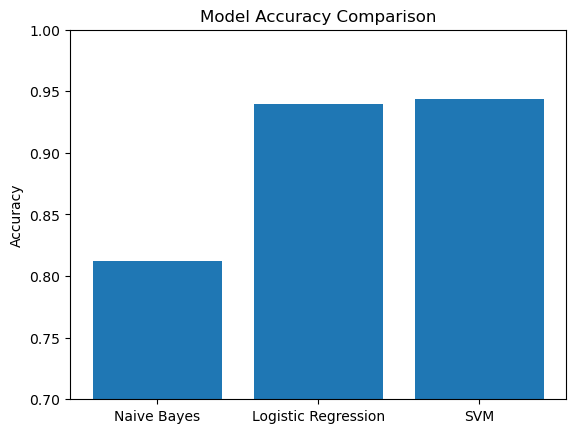

In [61]:
##Visualization
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [0.812, 0.940, 0.944]

plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.show()


# Conclusion

The sentiment analysis project successfully classified text data into positive, neutral, and negative categories using Natural Language Processing (NLP) and Machine Learning techniques.

Three algorithms — Naive Bayes, Logistic Regression, and Support Vector Machine (SVM) — were implemented and compared to evaluate their performance. The SVM model achieved the highest accuracy of 94.4%, outperforming both Logistic Regression (94.0%) and Naive Bayes (81.2%). This result demonstrates the effectiveness of SVM in handling high-dimensional text data and complex feature spaces.

Through text preprocessing, feature extraction (TF-IDF), and model tuning, the system effectively learned to distinguish sentiment patterns from textual data. Visualization techniques such as word clouds and sentiment distribution plots provided deeper insights into the emotional tone of the dataset.

Overall, the project highlights the importance of feature engineering, model selection, and data visualization in building accurate sentiment classification systems. The trained SVM model can be applied in real-world use cases such as social media monitoring, customer feedback analysis, and brand reputation management, helping organizations better understand and respond to public sentiment.